# Interlayer Coupling Dependent Bandgap of  $MoS_{2}$ Islands (_working title_)
* Stacking dependent bandgap of $MoS_{2}$ on (highly )HOPG substrates 

# <font color=blue>Fig 4- STM/S data analysis (Fig 4 S islands )</font>

## ($MoS_{2}$ islands on HOPG substrates) STS data analysis data analysis 

> * file loading : **SPMpy_file_loading_funcs**
    > * Loading gwyddion file (*.gwy) loading (after image treatments with Gwyddion)

> * 3D data analysis functions : **SPMpy_3D_data_analysis_funcs**
> * 2D data analysis functions : **SPMpy_2D_data_analysis_funcs**


* Authors : Dr. Jewook Park(IBS)
    * *IBS-VdWQS (Inistitute for Basic Science,Center for Van der Waals Quantum Solids), South Korea*
    * email :  jewookpark@ibs.re.kr

> **SPMpy** is a python package for scanning probe microscopy (SPM) data analysis, such as scanning tunneling microscopy and spectroscopy (STM/S) data and atomic force microscopy (AFM) images, which are inherently multidimensional. To analyze SPM data, SPMpy exploits recent image processing(a.k.a. Computer Vision) techniques. SPMpy data analysis functions utilize well-established Python packages, such as Numpy, PANDAS, matplotlib, Seaborn, holoview, etc. In addition, many parts are inspired by well-known SPM data analysis programs, for example, Wsxm and Gwyddion. Also, SPMpy is trying to apply lessons from 'Fundamentals in Data Visualization'(https://clauswilke.com/dataviz/).

>  **SPMpy** is an open-source project. (Github: https://github.com/Jewook-Park/SPMPY )
> * Contributions, comments, ideas, and error reports are always welcome. Please use the Github page or email jewookpark@ibs.re.kr. Comments & remarks should be in Korean or English. 


### Import necessary packages & loading **SPMpy** functions  
* file loading : SPMpy_file_loading_funcs
* 3D data analysis functions : SPMpy_3D_data_analysis_funcs
* 2D data analysis functions : SPMpy_2D_data_analysis_funcs

In [20]:
########################################
    #    * Step 1-1
    #    : Import necessary packages 
    #        import modules        
#########################################

import os
import glob
import numpy as np
import pandas as pd
import scipy as sp
from warnings import warn
from scipy import signal

import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import seaborn as sns
import skimage


# some packages may be yet to be installed
# please install "seaborn-image" via conda to avoid install error 
# conda install -c conda-forge seaborn-image
try:
     from pptx import Presentation
except ModuleNotFoundError:
    warn('ModuleNotFoundError: No module named Presentation')
    !pip install python-pptx  
    from pptx import Presentation
    from pptx.util import Inches, Pt

try:
    import nanonispy as nap
except ModuleNotFoundError:
    warn('ModuleNotFoundError: No module named nanonispy')
    !pip install nanonispy
    import nanonispy as nap



try:
    import xarray as xr
except ModuleNotFoundError:
    warn('ModuleNotFoundError: No module named xarray')
    
    !pip install xarray 
    import xarray as xr
    
try:
    import xrft
except ModuleNotFoundError:
    warn('ModuleNotFoundError: No module named xrft')
    !pip install xrft 
    import xrft
    
    
try:
    import holoviews as hv
except ModuleNotFoundError:
    warn('ModuleNotFoundError: No module named holoviews')
    !pip install holoviews 
    import holoviews as hv

try:
    import seaborn_image as isns
except ModuleNotFoundError:
    warn('ModuleNotFoundError: No module named seaborn_image')
    !conda install -c conda-forge seaborn-image
    import seaborn_image as isns
    
    
    
try:
    import hvplot.xarray
    import hvplot.pandas 
except ModuleNotFoundError:
    warn('ModuleNotFoundError: No module named hvplot')
    !pip install hvplot
    import hvplot.xarray
    import hvplot.pandas 



try:
    import gwyfile
except ModuleNotFoundError:
    warn('ModuleNotFoundError: No module named gwyfile')
    !pip install gwyfile
    import gwyfile
 
    
from SPMpy_file_loading_funcs import *
from SPMpy_2D_data_analysis_funcs import *
from SPMpy_3D_data_analysis_funcs import *



####
# isns setting 
isns.set_image(origin = 'lower')



C:\Users\user\anaconda3\lib\site-packages\seaborn_image\_context.py:128: UserWarning: Trying to register the cmap 'deep' which already exists.
  register_cmap(name=cmap, cmap=cmap_mpl)


### Checking up the file path
### 0.2. Grid DATA Import 
### $\Longrightarrow$    **files_in_folder**
* working folder(path) checkup
    * files_in_folder(path)
    *  sxm file $\to $  **img2xr**  $\to $  a xarray format
    *  sxm file $\to $   **grid2xr**  $\to $  a xarray format
    *  sxm file $\to $  **grid_line2xr** $\to $  a xarray format
    
## Choose the grid data file to analyze
* using **grid2xr** function 
    * '_fb' : add fwd/bwd data average 
        * grid_topo : 2D data 
        * grid_3D : 3D data
    * **I_fb** : I, (forwad + backward sweep )/2
    * **LIX_fb** : LIX, (forwad + backward sweep )/2
    * **dIdV** : dI/dV (using xr differentiate _class_ )
    * **LIX_unit_calc** : LIX_fb *  LIX_coefficient (for unit calibration) 

* after **grid_3D_gap** function 
    *  2D data :  CBM, VBM position assignment $\leftarrow$ based on **I** or **LIX**
        * CBM_I_mV, VBM_I_mV, gap_size_I 
        * CBM_LIX_mV, VBM_LIX_mV, gap_size_LIX
    *  3D data : LDOS_fb $\leftarrow$ after unit calc & offset adjust
        * I_fb, LIX_fb, LDOS_fb, LDOS_fb_CB, LDOS_fb_VB      
        * **I_fb** : I, (forwad + backward sweep )/2
        * **LIX_fb** : LIX, (forwad + backward sweep )/2
        * **LDOS_fb** : LIX_fb *  LIX_coefficient (for unit calibration)  + offset adjustment (according to LIX  at I=0)
        * **LDOS_fb_CB** : based on LIX assignment
        * **LDOS_fb_VB** : based on LIX assignment
        

In [21]:
# check the sxm files in the given folder
target_path = r'C:\IBS CALDES data\IBS Epitaxial vdW Quantum Solid\Papers\Preparation of pyramid and screw MoS2 on HOPG paper\Figure Preparation\Figure4  heterogeneities'
#target_path = r'C:\Users\jewoo\ownCloud\IBS Epitaxial vdW Quantum Solid\Papers\Preparation of pyramid and screw MoS2 on HOPG paper\Figure Preparation\Figure4  heterogeneities'
file_list_df = files_in_folder(target_path)
## Loading Image Channels
#file_list_df


##############
# choose the Topography of ROI 
S_1035 = file_list_df[(file_list_df.type == 'gwy') ]
#W_2009

S_1035_topo = gwy_image2df(S_1035.file_name.values[0])
S_1035_topo

Current Path =  C:\IBS CALDES data\IBS Epitaxial vdW Quantum Solid\Papers\Preparation of pyramid and screw MoS2 on HOPG paper\Figure Preparation\Figure4  heterogeneities
Changed Path =  C:\IBS CALDES data\IBS Epitaxial vdW Quantum Solid\Papers\Preparation of pyramid and screw MoS2 on HOPG paper\Figure Preparation\Figure4  heterogeneities
                    group  num                      file_name type
0         MoS2_HOPG_78K_0  035         MoS2_HOPG_78K_0035.sxm  sxm
1         MoS2_HOPG_78K_2  009         MoS2_HOPG_78K_2009.sxm  sxm
2       Grid Spectroscopy  002       Grid Spectroscopy002.3ds  3ds
3  Grid Spectroscopy_line  003  Grid Spectroscopy_line003.3ds  3ds
4  Grid Spectroscopy_line  004  Grid Spectroscopy_line004.3ds  3ds
5  Grid Spectroscopy_line  005  Grid Spectroscopy_line005.3ds  3ds
6  Grid Spectroscopy_line  006  Grid Spectroscopy_line006.3ds  3ds
7      MoS2_HOPG_78K_0035  NaN         MoS2_HOPG_78K_0035.gwy  gwy
8      MoS2_HOPG_78K_2009  NaN         MoS2_HOPG_78K_2009

,Z (Forward),Z (Backward),LIX_1_omega (Forward),LIX_1_omega (Backward)
xres,1024,1024,1024,1024
yres,1024,1024,1024,1024
xreal,8.000e-08,8.000e-08,8.000e-08,8.000e-08
yreal,8.000e-08,8.000e-08,8.000e-08,8.000e-08
si_unit_xy,{'unitstr': 'm'},{'unitstr': 'm'},{'unitstr': 'm'},{'unitstr': 'm'}
si_unit_z,{'unitstr': 'm'},{'unitstr': 'm'},{'unitstr': 'A'},{'unitstr': 'A'}
data,"[2.560659962811597e-09, 2.5607680585041267e-09...","[-3.4360247980202985e-08, -3.436008100266008e-...","[5.4906137972256415e-11, 5.4715366962156294e-1...","[5.596464958124159e-11, 6.892149351234167e-11,..."
xoff,NaN,-1.900e-07,-1.900e-07,-1.900e-07
yoff,NaN,4.100e-07,4.100e-07,4.100e-07


In [22]:
S_1035_topo_zm =  gwy_df_channel2xr (S_1035_topo,0)
S_1035_topo_zm

<xarray.DataArray (Y: 1024, X: 1024)>
array([[2.56065996e-09, 2.56076806e-09, 2.55967178e-09, ...,
        1.80646569e-09, 1.80646365e-09, 1.80997169e-09],
       [2.55991562e-09, 2.55938068e-09, 2.55840164e-09, ...,
        1.79410042e-09, 1.79590671e-09, 1.79788709e-09],
       [2.55773243e-09, 2.55691682e-09, 2.55634280e-09, ...,
        1.80999699e-09, 1.81267370e-09, 1.81515145e-09],
       ...,
       [1.88169488e-09, 1.88144060e-09, 1.88078131e-09, ...,
        1.34495815e-10, 1.36394478e-10, 1.37465359e-10],
       [1.87969184e-09, 1.88069878e-09, 1.88064345e-09, ...,
        1.32848049e-10, 1.34299071e-10, 1.34108739e-10],
       [1.87670929e-09, 1.87730767e-09, 1.87789182e-09, ...,
        1.31048553e-10, 1.32957875e-10, 1.34003887e-10]])
Coordinates:
  * Y        (Y) float64 0.0 7.813e-11 1.563e-10 ... 7.984e-08 7.992e-08
  * X        (X) float64 0.0 7.813e-11 1.563e-10 ... 7.984e-08 7.992e-08

C:\Users\user\anaconda3\lib\site-packages\seaborn_image\_context.py:128: UserWarning: Trying to register the cmap 'deep' which already exists.
  register_cmap(name=cmap, cmap=cmap_mpl)


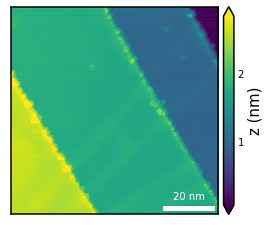

In [23]:
isns.set_image(origin = 'lower')

fig, ax = plt.subplots(figsize = (4,4))
isns.imshow(S_1035_topo_zm*1E9,
            robust = True, perc=(0.5,99.5),
            cmap = 'viridis',  
            dx=80/1024, 
            units="nm", 
            cbar_label = 'z (nm)',
            ax = ax)
plt.savefig('S_1035_topo_zm topo.svg')
plt.show()

In [26]:
################
# Choose the STS for  W islands 
    
S_grids = file_list_df[
    (file_list_df.type == '3ds') & 
    (file_list_df.file_name.str.contains('line'))]
S_grids

,group,num,file_name,type
3,Grid Spectroscopy_line,003,Grid Spectroscopy_line003.3ds,3ds
4,Grid Spectroscopy_line,004,Grid Spectroscopy_line004.3ds,3ds
5,Grid Spectroscopy_line,005,Grid Spectroscopy_line005.3ds,3ds
6,Grid Spectroscopy_line,006,Grid Spectroscopy_line006.3ds,3ds


## Grid 003 

In [27]:
grid_xr = grid2xr(S_grids.file_name.values[0])

Grid Spectroscopy_line003
No Segments
Grid data acquired at bias = -2.0V
start from POS bias


In [28]:
grid_xr

<xarray.Dataset>
Dimensions:     (Y: 80, X: 10, bias_mV: 257)
Coordinates:
  * X           (X) float64 -2.26e-07 -2.18e-07 -2.1e-07 ... -1.62e-07 -1.54e-07
  * Y           (Y) float64 4.541e-07 4.542e-07 ... 4.638e-07 4.639e-07
  * bias_mV     (bias_mV) float64 996.1 984.4 972.7 ... -1.992e+03 -2.004e+03
Data variables:
    I_fwd       (Y, X, bias_mV) float64 1.266e-09 1.213e-09 ... 0.0 0.0
    I_bwd       (Y, X, bias_mV) float64 5.834e-10 5.278e-10 4.63e-10 ... 0.0 0.0
    LIX_fwd     (Y, X, bias_mV) float64 2.602e-10 2.415e-10 ... 0.0 0.0
    LIX_bwd     (Y, X, bias_mV) float64 1.379e-10 1.229e-10 1.08e-10 ... 0.0 0.0
    topography  (Y, X) >f4 -3.542e-08 -3.546e-08 -3.543e-08 ... 0.0 0.0 0.0
Attributes:
    title:           Grid Spectroscopy_line003.3ds (1.0 V ~ -2.0 V) \n at Bia...
    image_size:      [8e-08, 9.999995e-09]
    X_spacing:       8e-09
    Y_spacing:       1.2499993750000001e-10
    freq_X_spacing:  124999999.99999999
    freq_Y_spacing:  8000004000.001999

In [29]:
grid_xr = grid_xr.assign_coords({'X': grid_xr.X -  grid_xr.X.min()})
grid_xr = grid_xr.assign_coords({'Y': grid_xr.Y -  grid_xr.Y.min()})

# grid data to xr 
grid_xr['I_fb'] = (grid_xr.I_fwd + grid_xr.I_fwd)/2
grid_xr['LIX_fb'] = (grid_xr.LIX_fwd + grid_xr.LIX_fwd)/2
# add 'I' & 'LIX' channel "fb = [fwb+bwd] / 2 " 

grid_topo = grid_xr[['topography']]
# topography 
grid_3D = grid_xr[['I_fb','LIX_fb']]
# averaged I & LIX 


grid_3D_gap = grid_3D_Gap(grid_3D)
# assign gap from STS

### Pretreatments 
* In case of **Energy gap** in dI/dV 
* (I or LIX) is almost Zero. less than measurment error bar
    * I_min_pA= 1E-11 // LIX_min_pA= 1E-12
    * find gap size & adjust LIX offset, based on I or LIX
        * to prevent ripples in dI/dV polyfit 


In [30]:
grid_3D_gap

# check the STS results 

<xarray.Dataset>
Dimensions:       (X: 10, bias_mV: 257)
Coordinates:
  * X             (X) float64 0.0 8e-09 1.6e-08 ... 5.6e-08 6.4e-08 7.2e-08
    Y             float64 0.0
  * bias_mV       (bias_mV) float64 996.1 984.4 972.7 ... -1.992e+03 -2.004e+03
Data variables:
    I_fb          (X, bias_mV) float64 1.266e-09 1.213e-09 ... -2.251e-10
    LIX_fb        (X, bias_mV) float64 2.602e-10 2.415e-10 ... 2.35e-11 2.62e-11
    CBM_I_mV      (X) float64 -597.7 -597.7 -597.7 ... -656.3 -1.23e+03 410.2
    VBM_I_mV      (X) float64 -1.23e+03 -1.23e+03 -656.3 ... -1.289e+03 -714.8
    gap_size_I    (X) float64 632.8 632.8 58.59 234.4 ... 632.8 58.59 1.125e+03
    LDOS_fb       (X, bias_mV) float64 3.163e-10 2.936e-10 ... 3.186e-11
    CBM_LIX_mV    (X) float64 -820.3 58.59 0.0 210.9 ... 117.2 -246.1 0.0 -117.2
    VBM_LIX_mV    (X) float64 -820.3 58.59 0.0 -1.43e+03 ... -562.5 0.0 -703.1
    gap_size_LIX  (X) float64 0.0 0.0 0.0 1.641e+03 ... 750.0 316.4 0.0 585.9
    LDOS_fb_CB    (X, bias_mV) float64 3.163e-10 2.936e-10 2.74e-10 ... nan nan
    LDOS_fb_VB    (X, bias_mV) float64 nan nan nan ... 2.857e-11 3.186e-11
Attributes:
    title:            Grid Spectroscopy_line003.3ds (1.0 V ~ -2.0 V) \n at Bi...
    image_size:       [8e-08, 9.999995e-09]
    X_spacing:        8e-09
    Y_spacing:        1.2499993750000001e-10
    freq_X_spacing:   124999999.99999999
    freq_Y_spacing:   8000004000.001999
    I[A]_limit:       1e-13
    LDOS[A/V]_limit:  1.2157805627144276e-14

### interfactive plot with hvplot


In [31]:
from hvplot import hvPlot
import holoviews as hv
import hvplot.xarray  # noqa
import panel as pn
import panel.widgets as pnw
import ipywidgets as ipw
from holoviews import opts
from holoviews.streams import Stream, param

### LDOS unit calibration 
* check the (X,Y) = (1,0) (now I am using the line STS)

In [32]:
(hv.Curve(grid_3D.isel(X = 1, Y =0).LIX_fb, label = 'LIX_fb').opts(axiswise=True)\
*hv.Curve(grid_3D.isel(X = 1, Y =0).dIdV,  label = 'dIdV').opts(axiswise=True)\
*hv.Curve(grid_3D.isel(X = 1, Y =0).LIX_unit_calc, label = 'LIX_unit_calc').opts(axiswise=True)).opts(legend_position='top_left').relabel('grid_3D')\
+ hv.Curve(grid_3D_gap.isel(X = 1, Y =0).LDOS_fb,  label = 'grid_3D_gap.LDOS_fb').opts(axiswise=True, ylabel = 'dI/dV [A/V]')

:Layout
   .Overlay.Grid_3D                     :Overlay
      .Curve.LIX_fb        :Curve   [bias_mV]   (LIX_fb)
      .Curve.DIdV          :Curve   [bias_mV]   (dIdV)
      .Curve.LIX_unit_calc :Curve   [bias_mV]   (LIX_unit_calc)
   .Curve.Grid_3D_gap_full_stop_LDOS_fb :Curve   [bias_mV]   (LDOS_fb)

### 3D plot & slicing 
* use the holoview 
    * or hvplot(with panel- widget) interactive plot  $\to$  event handling  $\to$  later 
    * mayavi? $\to$ later

### Topography**  check. 

In [228]:
grid_topo_th = threshold_mean_xr(grid_topo)
grid_topo_zm = grid_topo.where(grid_topo_th.topography.isnull(), drop = True)


C:\Users\user\anaconda3\lib\site-packages\seaborn_image\_context.py:128: UserWarning: Trying to register the cmap 'deep' which already exists.
  register_cmap(name=cmap, cmap=cmap_mpl)


<AxesSubplot:>

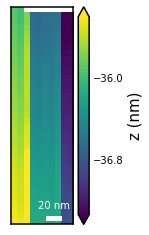

In [229]:
isns.set_image(origin = 'lower')

#isns.imshow( plane_fit_y(grid_topo.topography) )
# check the how to show the 2D image 

isns.imshow(grid_topo_zm.topography*1E9,
            robust = True,
            aspect = 'equal', 
            cmap = 'viridis', 
            dx=80/10, units="nm", 
            cbar_label = 'z (nm)',
            fontsize='xx-large')

### topography based terrace assign

<AxesSubplot:xlabel='X'>

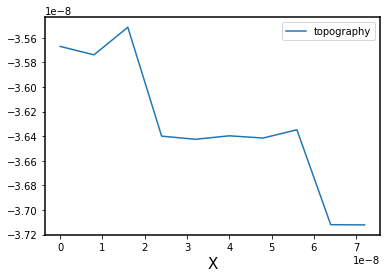

In [230]:
grid_topo_zm_y_avg  = grid_topo_zm.mean (dim = 'Y')
# test y avg curve 
grid_topo_zm_y_avg.to_dataframe().plot()

In [231]:
grid_topo_zm_y_avg_th =  threshold_multiotsu_xr( grid_topo_zm_y_avg, multiclasses= 3)

# xr.concat  : for the same data_vars names
# xr.concat ([grid_topo, grid_topo_zm_y_avg_th],dim ="X")

topography


### add terrace assignment data & merge

In [232]:
# xr data set data vars name change 
grid_topo_zm_y_avg_th = grid_topo_zm_y_avg_th.rename_vars({'topography':'terraces'})

# MERGE the terrace data vars to the original dataset 

grid_topo_terraces = grid_topo.merge(grid_topo_zm_y_avg_th)
grid_topo_terraces
#xr.concat ([grid_topo, grid_topo_zm_y_avg_th], dim = "Y")#,join="override")

<xarray.Dataset>
Dimensions:     (Y: 80, X: 10)
Coordinates:
  * X           (X) float64 0.0 8e-09 1.6e-08 ... 5.6e-08 6.4e-08 7.2e-08
  * Y           (Y) float64 0.0 1.25e-10 2.5e-10 ... 9.75e-09 9.875e-09
Data variables:
    topography  (Y, X) >f4 -3.542e-08 -3.546e-08 -3.543e-08 ... 0.0 0.0 0.0
    terraces    (X) int64 2 2 2 1 1 1 1 2 0 0
Attributes:
    title:           Grid Spectroscopy_line003.3ds (1.0 V ~ -2.0 V) \n at Bia...
    image_size:      [8e-08, 9.999995e-09]
    X_spacing:       8e-09
    Y_spacing:       1.2499993750000001e-10
    freq_X_spacing:  124999999.99999999
    freq_Y_spacing:  8000004000.001999
    threshold:       {'topography_threshold_mean': -1.5522891e-08}

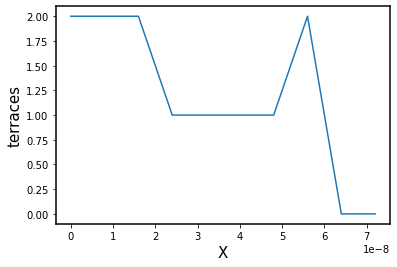

In [233]:
grid_topo_terraces.terraces.plot()

### extract the layer dependent dataframe

In [234]:
#grid_topo_terraces.terraces == 2
grid_3D_4ML_df = grid_3D.where(grid_topo_terraces.terraces == 2, 
                            drop = True).where(grid_3D.X<3E-8,
                                               drop = True).LIX_unit_calc.to_dataframe()
grid_3D_4ML_df = grid_3D_4ML_df.rename(columns = {'LIX_unit_calc':'S4ML'})
#grid_3D_4ML_df

grid_3D_3ML_df = grid_3D.where(grid_topo_terraces.terraces == 1, 
                            drop = True).where(grid_3D.X<7E-8,
                                               drop = True).LIX_unit_calc.to_dataframe()
grid_3D_3ML_df = grid_3D_3ML_df.rename(columns = {'LIX_unit_calc':'S3ML'})
#grid_3D_3ML_df

grid_3D_2ML_df = grid_3D.where(grid_topo_terraces.terraces == 0, 
                            drop = True).where(grid_3D.X>3E-8,
                                               drop = True).LIX_unit_calc.to_dataframe()
grid_3D_2ML_df = grid_3D_2ML_df.rename(columns = {'LIX_unit_calc':'S2ML'})
#grid_3D_3ML_df

grid_3D_S234_df =pd.concat([grid_3D_2ML_df,grid_3D_3ML_df,grid_3D_4ML_df], axis =1)
grid_3D_S234_df



S2ML  S3ML      S4ML
Y         X         bias_mV                             
0.000e+00 6.400e-08 9.961e+02  2.810e-10   NaN       NaN
                    9.844e+02  2.549e-10   NaN       NaN
                    9.727e+02  2.330e-10   NaN       NaN
                    9.609e+02  2.259e-10   NaN       NaN
                    9.492e+02  2.133e-10   NaN       NaN
...                                  ...   ...       ...
9.875e-09 1.600e-08 -1.957e+03       NaN   NaN 0.000e+00
                    -1.969e+03       NaN   NaN 0.000e+00
                    -1.980e+03       NaN   NaN 0.000e+00
                    -1.992e+03       NaN   NaN 0.000e+00
                    -2.004e+03       NaN   NaN 0.000e+00

[185040 rows x 3 columns]

In [235]:
grid_3D_S234_df = grid_3D_S234_df.reset_index().melt(id_vars = ['Y','X','bias_mV'])
#grid_3D_S234_df
grid_3D_S234_df = grid_3D_S234_df.rename(columns = {'variable':'terrace','value':'dIdV'} )
grid_3D_S234_df

,Y,X,bias_mV,terrace,dIdV
0,0.000e+00,6.400e-08,9.961e+02,S2ML,2.810e-10
1,0.000e+00,6.400e-08,9.844e+02,S2ML,2.549e-10
2,0.000e+00,6.400e-08,9.727e+02,S2ML,2.330e-10
3,0.000e+00,6.400e-08,9.609e+02,S2ML,2.259e-10
4,0.000e+00,6.400e-08,9.492e+02,S2ML,2.133e-10
...,...,...,...,...,...
555115,9.875e-09,1.600e-08,-1.957e+03,S4ML,0.000e+00
555116,9.875e-09,1.600e-08,-1.969e+03,S4ML,0.000e+00
555117,9.875e-09,1.600e-08,-1.980e+03,S4ML,0.000e+00
555118,9.875e-09,1.600e-08,-1.992e+03,S4ML,0.000e+00


### plot with sns

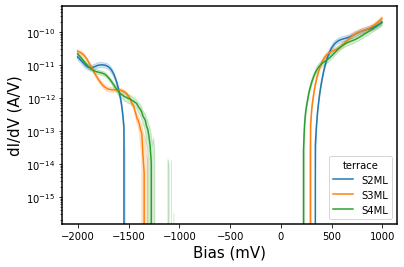

In [236]:
fig,ax = plt.subplots(figsize = (6,4))
sns.lineplot(data = grid_3D_S234_df, x = 'bias_mV', y ='dIdV', hue = 'terrace', ax= ax)
ax.set_ylabel('dI/dV (A/V)')
ax.set_xlabel('Bias (mV)')
ax.set_yscale('log')
plt.show()


### extract the mean values w.r.t. layers

In [237]:
##  layer dependent means
grid_3D_S234_df_mean = grid_3D_S234_df.groupby(['bias_mV', 'terrace']).dIdV.mean().unstack()
#grid_3D_S234_df_mean


##  layer dependent means ==> melt for sns plot 

grid_3D_S234_df_mean_melt = grid_3D_S234_df_mean.reset_index().melt(id_vars = 'bias_mV').rename(columns = {'value' : 'dIdV'})
#grid_3D_S234_df_mean_melt

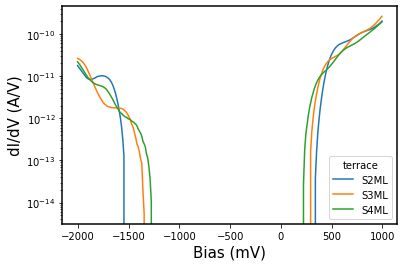

In [238]:
fig,ax = plt.subplots(figsize = (6,4))
sns.lineplot(data = grid_3D_S234_df_mean_melt, x = 'bias_mV', y = 'dIdV', hue = 'terrace', ax =ax)

#grid_3D_S234_df.groupby(['bias_mV', 'terrace']).dIdV.mean().unstack().plot( ax= ax)
ax.set_ylabel('dI/dV (A/V)')
ax.set_xlabel('Bias (mV)')
ax.set_yscale('log')
plt.show()


### find peaks 

#### check the mean curves without CI values + seaborn plot 
* concat the STS curves 
* the same as seaborn result


#### Check 2nd derivative to find peaks 
* convert to Xarray 
* calc derivative 
* smoothing with 'savgol_filter'

In [239]:
grid_3D_S234_df_mean

terrace,S2ML,S3ML,S4ML
bias_mV,,,
-2.004e+03,1.776e-11,2.631e-11,2.195e-11
-1.992e+03,1.610e-11,2.546e-11,2.006e-11
-1.980e+03,1.491e-11,2.451e-11,1.829e-11
-1.969e+03,1.362e-11,2.335e-11,1.657e-11
-1.957e+03,1.235e-11,2.206e-11,1.497e-11
...,...,...,...
9.492e+02,1.591e-10,1.939e-10,1.520e-10
9.609e+02,1.680e-10,2.078e-10,1.616e-10
9.727e+02,1.775e-10,2.237e-10,1.711e-10


### Find peak positions 
* using 2nd derivative of each curves
* __Local minimums in d2(LDOS)/dV2) = Peaks in LDOS__
* delete the minor peak ( comes from ripples in the gap region)

#### find dips in 2nd derivative for peaks in STS 
* use dps 
* Define LIX resolution limit 
* (manually )Select peaks 


In [240]:
# SG smoothing  first 
for ch in grid_3D_S234_df_mean: 
    grid_3D_S234_df_mean[ch] = sp.signal.savgol_filter(grid_3D_S234_df_mean[ch],
                                            window_length = 7,
                                            polyorder = 3)

In [280]:
grid_3D_S234_df_mean_2deriv_sg

<xarray.Dataset>
Dimensions:   (bias_mV: 257)
Coordinates:
  * bias_mV   (bias_mV) float64 -2.004e+03 -1.992e+03 -1.98e+03 ... 984.4 996.1
Data variables:
    S2ML      (bias_mV) float64 2.888e-16 5.628e-16 ... 1.108e-14 7.181e-15
    S3ML      (bias_mV) float64 -4.872e-16 -8.659e-16 ... 1.422e-14 9.887e-15
    S4ML      (bias_mV) float64 2.658e-16 4.284e-16 ... 5.946e-15 3.981e-15
    S2ML_pks  object (array([  8,  35,  55,  62,  66,  72,  78,  85,  95, 102...

In [282]:
# 2nd derivative 
grid_3D_S234_df_mean_1deriv = grid_3D_S234_df_mean.to_xarray().differentiate(coord = 'bias_mV')
grid_3D_S234_df_mean_2deriv = grid_3D_S234_df_mean_1deriv.differentiate(coord = 'bias_mV')
grid_3D_S234_df_mean_2deriv_sg =  grid_3D_S234_df_mean_2deriv.copy()

# smoothing after 2nd derivative 
for ch in grid_3D_S234_df_mean_2deriv:
    grid_3D_S234_df_mean_2deriv_sg[ch].values =  sp.signal.savgol_filter(grid_3D_S234_df_mean_2deriv[ch].values,
                                                              window_length = 7,
                                                              polyorder = 3)

#grid_3D_S234_df_mean_2deriv_sg

###########

# find the peaks& dips 

for ch in grid_3D_S234_df_mean_2deriv_sg:
    grid_3D_S234_df_mean_2deriv_sg[ch+'_pks'] = xr.DataArray(sp.signal.find_peaks(grid_3D_S234_df_mean_2deriv_sg[ch].values))
    grid_3D_S234_df_mean_2deriv_sg[ch+'_dps'] = xr.DataArray(sp.signal.find_peaks(-1*grid_3D_S234_df_mean_2deriv_sg[ch].values, distance  = 10))
    
grid_3D_S234_df_mean_2deriv_sg

########################

<xarray.Dataset>
Dimensions:   (bias_mV: 257)
Coordinates:
  * bias_mV   (bias_mV) float64 -2.004e+03 -1.992e+03 -1.98e+03 ... 984.4 996.1
Data variables:
    S2ML      (bias_mV) float64 2.888e-16 5.628e-16 ... 1.108e-14 7.181e-15
    S3ML      (bias_mV) float64 -4.872e-16 -8.659e-16 ... 1.422e-14 9.887e-15
    S4ML      (bias_mV) float64 2.658e-16 4.284e-16 ... 5.946e-15 3.981e-15
    S2ML_pks  object (array([  8,  35,  55,  62,  66,  72,  78,  85,  95, 102...
    S2ML_dps  object (array([ 27,  50,  63,  75,  89, 106, 118, 128, 138, 154...
    S3ML_pks  object (array([ 12,  49,  55,  61,  65,  71,  76,  80,  85,  91...
    S3ML_dps  object (array([  4,  38,  58,  74,  88, 104, 114, 138, 159, 169...
    S4ML_pks  object (array([  7,  32,  45,  55,  61,  71,  79,  85,  91, 100...
    S4ML_dps  object (array([ 23,  49,  65,  75,  88, 103, 114, 132, 147, 159...

In [258]:
# pks N dps
S2ML_dps = grid_3D_S234_df_mean_2deriv_sg.S2ML_dps.data.item()[0]
S3ML_dps = grid_3D_S234_df_mean_2deriv_sg.S3ML_dps.data.item()[0]
S4ML_dps = grid_3D_S234_df_mean_2deriv_sg.S4ML_dps.data.item()[0]

# set LDOS limit 
LIX_limit= 1E-15

In [261]:
# LDOS value at the peak is larger than LIX_limit
#(W_mean_df.W1[W1_1_dps] > LIX_limit)
S2ML_dps = S2ML_dps[grid_3D_S234_df_mean.iloc[S2ML_dps].S2ML > LIX_limit]
S3ML_dps = S3ML_dps[grid_3D_S234_df_mean.iloc[S3ML_dps].S3ML > LIX_limit]
S4ML_dps = S4ML_dps[grid_3D_S234_df_mean.iloc[S4ML_dps].S4ML > LIX_limit]


##### S2ML Dips

Text(0.5, 0.98, 'S2_2ML_peaks')

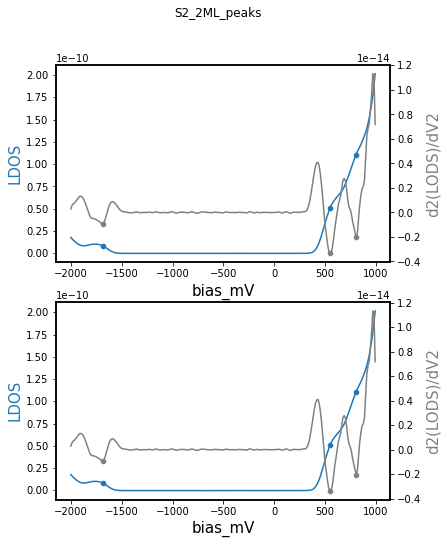

In [292]:
S2ML_mean = grid_3D_S234_df_mean.S2ML
S2ML_mean_2deriv = grid_3D_S234_df_mean_2deriv_sg.S2ML.to_pandas()
#S2ML_mean

fig,axes = plt.subplots(2,1, figsize = (6,8))
axs = axes.ravel()

axs0tw = axs[0].twinx()
axs1tw = axs[1].twinx()
# double Y setting 

sns.lineplot(data = S2ML_mean,
             ax=axs[0], color  = 'tab:blue')
sns.scatterplot(data = S2ML_mean.iloc[S2ML_dps],
                ax=axs[0], color  = 'tab:blue')
axs[0].set_ylabel('LDOS', color='tab:blue')

sns.lineplot(data = S2ML_mean_2deriv, 
             ax=axs0tw, color  = 'grey')
sns.scatterplot(data = S2ML_mean_2deriv.iloc[S2ML_dps],
                ax=axs0tw, color  = 'grey')
axs0tw.set_ylabel('d2(LODS)/dV2', color='grey')


# selected peak points 
S2ML_dps_slct = S2ML_dps[[0,1,2]]
#print(W2_1_dps_slct)

sns.lineplot(data = S2ML_mean,
             ax=axs[1], color  = 'tab:blue')
sns.scatterplot(data = S2ML_mean.iloc[S2ML_dps_slct],
                ax=axs[1], color  = 'tab:blue')
axs[1].set_ylabel('LDOS', color='tab:blue')

sns.lineplot(data = S2ML_mean_2deriv, 
             ax=axs1tw, color  = 'grey')
sns.scatterplot(data = S2ML_mean_2deriv.iloc[S2ML_dps_slct],
                ax=axs1tw, color  = 'grey')
axs1tw.set_ylabel('d2(LODS)/dV2', color='grey')


plt.suptitle('S2_2ML_peaks')

##### S3ML Dips

Text(0.5, 0.98, 'S2_3ML_peaks')

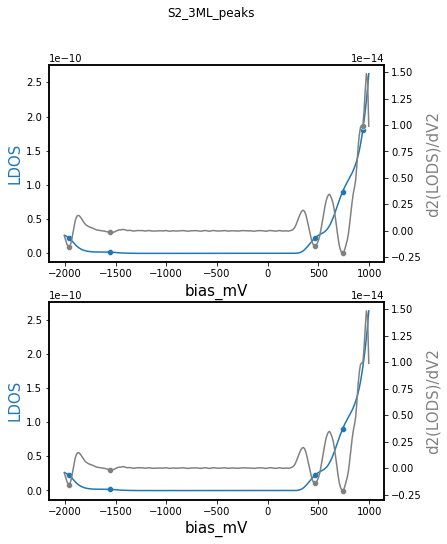

In [295]:
S3ML_mean = grid_3D_S234_df_mean.S3ML
S3ML_mean_2deriv = grid_3D_S234_df_mean_2deriv_sg.S3ML.to_pandas()
#S3ML_mean

fig,axes = plt.subplots(2,1, figsize = (6,8))
axs = axes.ravel()

axs0tw = axs[0].twinx()
axs1tw = axs[1].twinx()
# double Y setting 

sns.lineplot(data = S3ML_mean,
             ax=axs[0], color  = 'tab:blue')
sns.scatterplot(data = S3ML_mean.iloc[S3ML_dps],
                ax=axs[0], color  = 'tab:blue')
axs[0].set_ylabel('LDOS', color='tab:blue')

sns.lineplot(data = S3ML_mean_2deriv, 
             ax=axs0tw, color  = 'grey')
sns.scatterplot(data = S3ML_mean_2deriv.iloc[S3ML_dps],
                ax=axs0tw, color  = 'grey')
axs0tw.set_ylabel('d2(LODS)/dV2', color='grey')


# selected peak points 
S3ML_dps_slct = S3ML_dps[[0,1,2,3]]
#print(W2_1_dps_slct)

sns.lineplot(data = S3ML_mean,
             ax=axs[1], color  = 'tab:blue')
sns.scatterplot(data = S3ML_mean.iloc[S3ML_dps_slct],
                ax=axs[1], color  = 'tab:blue')
axs[1].set_ylabel('LDOS', color='tab:blue')

sns.lineplot(data = S3ML_mean_2deriv, 
             ax=axs1tw, color  = 'grey')
sns.scatterplot(data = S3ML_mean_2deriv.iloc[S3ML_dps_slct],
                ax=axs1tw, color  = 'grey')
axs1tw.set_ylabel('d2(LODS)/dV2', color='grey')


plt.suptitle('S2_3ML_peaks')

##### S4ML Dips

Text(0.5, 0.98, 'S2_4ML_peaks')

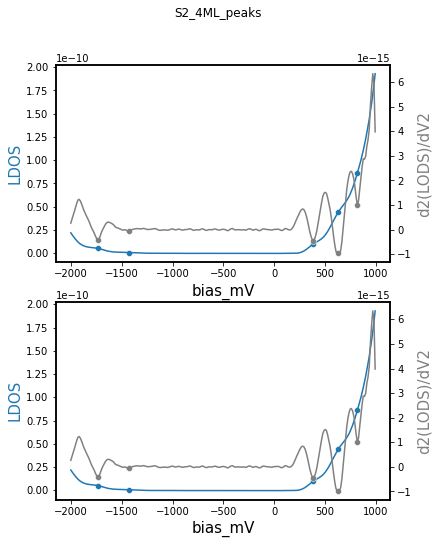

In [301]:
S4ML_mean = grid_3D_S234_df_mean.S4ML
S4ML_mean_2deriv = grid_3D_S234_df_mean_2deriv_sg.S4ML.to_pandas()
#S3ML_mean

fig,axes = plt.subplots(2,1, figsize = (6,8))
axs = axes.ravel()

axs0tw = axs[0].twinx()
axs1tw = axs[1].twinx()
# double Y setting 

sns.lineplot(data = S4ML_mean,
             ax=axs[0], color  = 'tab:blue')
sns.scatterplot(data = S4ML_mean.iloc[S4ML_dps],
                ax=axs[0], color  = 'tab:blue')
axs[0].set_ylabel('LDOS', color='tab:blue')

sns.lineplot(data = S4ML_mean_2deriv, 
             ax=axs0tw, color  = 'grey')
sns.scatterplot(data = S4ML_mean_2deriv.iloc[S4ML_dps],
                ax=axs0tw, color  = 'grey')
axs0tw.set_ylabel('d2(LODS)/dV2', color='grey')


# selected peak points 
S4ML_dps_slct = S4ML_dps[[0,1,2,3,4]]


sns.lineplot(data = S4ML_mean,
             ax=axs[1], color  = 'tab:blue')
sns.scatterplot(data = S4ML_mean.iloc[S4ML_dps_slct],
                ax=axs[1], color  = 'tab:blue')
axs[1].set_ylabel('LDOS', color='tab:blue')

sns.lineplot(data = S4ML_mean_2deriv, 
             ax=axs1tw, color  = 'grey')
sns.scatterplot(data = S4ML_mean_2deriv.iloc[S4ML_dps_slct],
                ax=axs1tw, color  = 'grey')
axs1tw.set_ylabel('d2(LODS)/dV2', color='grey')


plt.suptitle('S2_4ML_peaks')

###  plot peaks & curves


In [310]:
S3ML_mean.iloc[S3ML_dps]+offset_3ML

bias_mV
-1.957e+03   2.400e-11
-1.559e+03   3.653e-12
4.688e+02    2.489e-11
7.383e+02    9.214e-11
9.375e+02    1.826e-10
Name: S3ML, dtype: float64

Text(0.5, 0, 'Bias (mV)')

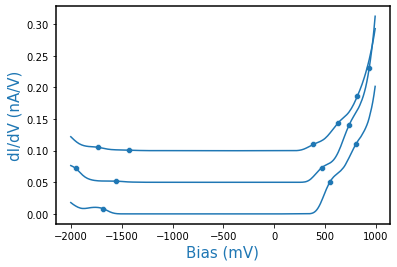

In [317]:
# W stacks 

fig,axs = plt.subplots(figsize = (6,4))


offset_2ML = 0E-11
offset_3ML = 5E-11
offset_4ML = 10E-11


sns.lineplot(data = S2ML_mean*1E9,
             ax=axs, color  = 'tab:blue')
sns.scatterplot(data = S2ML_mean.iloc[S2ML_dps]*1E9,
                ax=axs, color  = 'tab:blue')
axs.set_ylabel('LDOS', color='tab:blue')



sns.lineplot(data = (S3ML_mean+offset_3ML)*1E9,
             ax=axs, color  = 'tab:blue')
sns.scatterplot(data = (S3ML_mean.iloc[S3ML_dps]+offset_3ML)*1E9,
                ax=axs, color  = 'tab:blue')
axs.set_ylabel('LDOS', color='tab:blue')

sns.lineplot(data = (S4ML_mean+offset_4ML)*1E9,
             ax=axs, color  = 'tab:blue')
sns.scatterplot(data = (S4ML_mean.iloc[S4ML_dps]+offset_4ML)*1E9,
                ax=axs, color  = 'tab:blue')
axs.set_ylabel('LDOS', color='tab:blue')

axs.set_ylabel('dI/dV (nA/V)', color='tab:blue')
axs.set_xlabel('Bias (mV)', color='tab:blue')
